In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('nigerian_billoniares.csv')

In [3]:
data

,Name,Networth,Age,StateOfOrigin,Source,Industry
0,Aliko Dangote,$14.00,64.0,Kano,"cement, sugar",Manufacturing
1,Mike Adenuga,$7.30,68.0,Oyo,"telecom, oil",Diversified
2,Abdulsamad Rabiu,$6.90,61.0,Kano,"cement, sugar",Diversified
3,Femi Otedola,$5.90,57.0,Oyo,oil distribution,Energy
4,Arthur Eze,$5.80,73.0,Anambra,"oil production, governance",Energy
...,...,...,...,...,...,...
95,Ike Ekweremadu,$0.10,60.0,Enugu,governance,Politics
96,Michael Ade Ojo,$0.10,84.0,Ondo,automobile distribution,Automotive
97,Rasaq Okoya,$0.10,82.0,Lagos,household goods,Manufacturing
98,Raymond Dokpesi,$0.10,70.0,Edo,television broadcasting,Media & Entertainment


In [4]:
data.isnull().sum()

Name             0
Networth         0
Age              6
StateOfOrigin    1
Source           0
Industry         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           100 non-null    object 
 1   Networth       100 non-null    object 
 2   Age            94 non-null     float64
 3   StateOfOrigin  99 non-null     object 
 4   Source         100 non-null    object 
 5   Industry       100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [6]:
data[['Industry']].groupby(['Industry']).size()

Industry
Automotive                3
Diversified              23
Energy                   14
Energy, Sports            1
Fashion & Retail          3
Finance & Investments    10
Food & Beverage           1
Gambling                  1
Healthcare                3
Healthcare, Politics      1
Hospitality               1
Logistics                 2
Manufacturing             3
Manufacturing             1
Media & Entertainment     3
Politics                 20
Real Estate               2
Religion                  4
Service                   1
Technology                2
Transportation            1
dtype: int64

In [7]:
data['Networth'].replace(to_replace=r'\$', value='', regex=True, inplace=True)
data["Networth"] = data["Networth"].astype("float64")

In [8]:
data

,Name,Networth,Age,StateOfOrigin,Source,Industry
0,Aliko Dangote,14.0,64.0,Kano,"cement, sugar",Manufacturing
1,Mike Adenuga,7.3,68.0,Oyo,"telecom, oil",Diversified
2,Abdulsamad Rabiu,6.9,61.0,Kano,"cement, sugar",Diversified
3,Femi Otedola,5.9,57.0,Oyo,oil distribution,Energy
4,Arthur Eze,5.8,73.0,Anambra,"oil production, governance",Energy
...,...,...,...,...,...,...
95,Ike Ekweremadu,0.1,60.0,Enugu,governance,Politics
96,Michael Ade Ojo,0.1,84.0,Ondo,automobile distribution,Automotive
97,Rasaq Okoya,0.1,82.0,Lagos,household goods,Manufacturing
98,Raymond Dokpesi,0.1,70.0,Edo,television broadcasting,Media & Entertainment


[Text(0.5, 1.0, 'Top 10 Wealthiest People in Nigeria')]

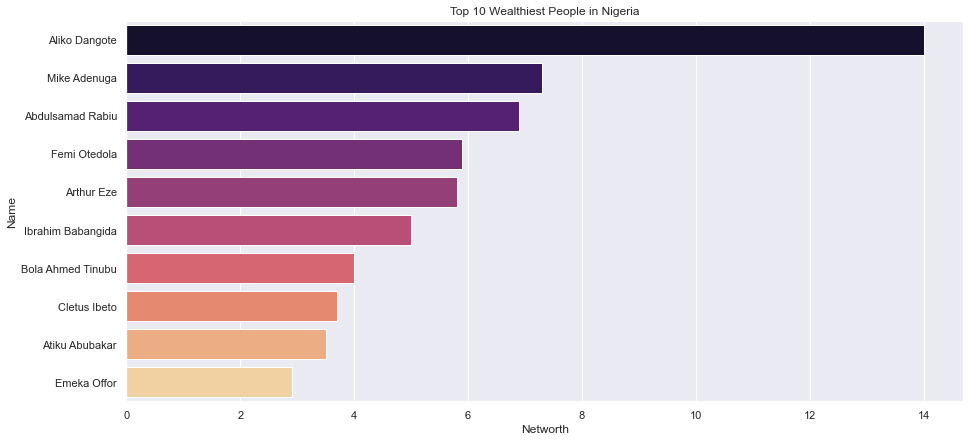

In [9]:
df_con = data.head(10)
sns.set(rc={"figure.figsize":(15, 7)}) 
sns.barplot(x=df_con['Networth'], y=df_con['Name'], 
            palette = 'magma').set(title='Top 10 Wealthiest People in Nigeria')

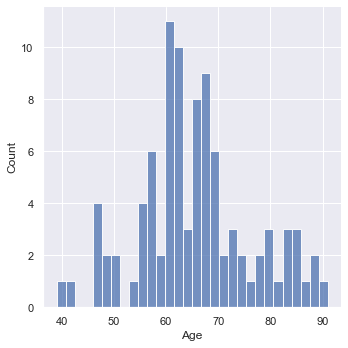

In [10]:
sns.displot(data['Age'], bins=30)

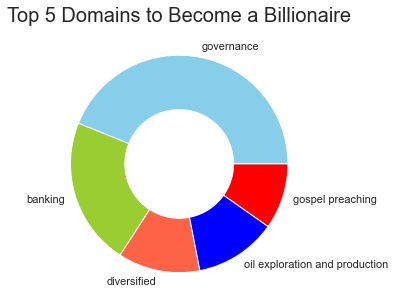

In [11]:
a = data["Source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Domains to Become a Billionaire", fontsize=20)
plt.show()

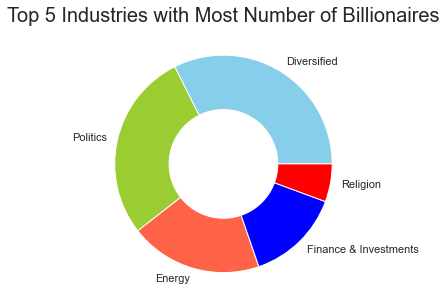

In [12]:
a = data["Industry"].value_counts().head()
index = a.index
industries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(industries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Industries with Most Number of Billionaires", fontsize=20)
plt.show()

In [13]:
industry_df = data[['Industry']].groupby(['Industry']).size().reset_index(name = "counts")
industry_df.sort_values('counts', inplace = True, ascending = True)

Text(0, 0.5, 'Industry')

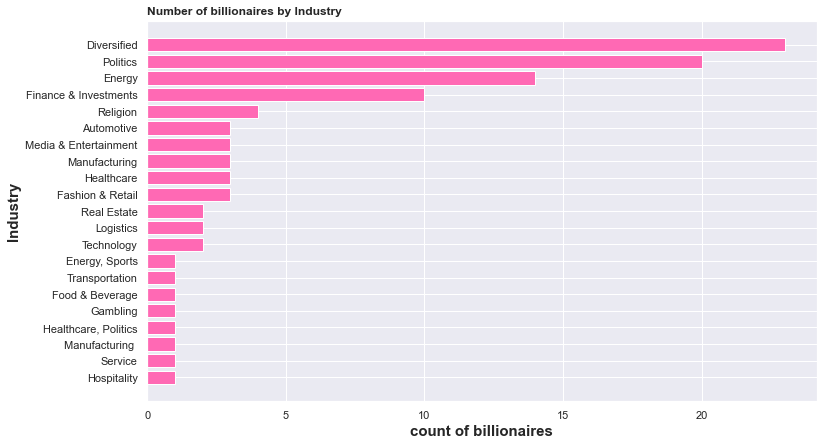

In [14]:
fig, ax = plt.subplots(figsize =(12, 7))
 
ax.barh(industry_df['Industry'], industry_df['counts'], color ='hotPink')
ax.set_title('Number of billionaires by Industry',fontweight = 'bold',loc ='left')
plt.xlabel('count of billionaires', fontweight ='bold', fontsize = 15)
plt.ylabel('Industry', fontweight ='bold', fontsize = 15)

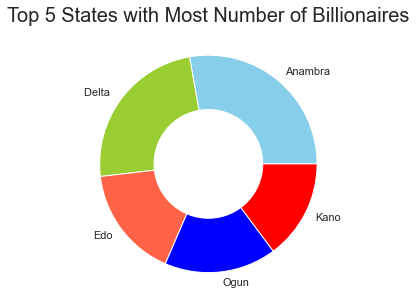

In [15]:
a = data["StateOfOrigin"].value_counts().head()
index = a.index
Countries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(Countries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 States with Most Number of Billionaires", fontsize=20)
plt.show()